In [5]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt
import numpy as np
# Load the ratings dataset
ratings_df = pd.read_csv('AliFehmi/MLProjects/ml-1m/ratings.dat', 
                         sep='::', 
                         names=['UserID', 'MovieID', 'Rating', 'Timestamp'], 
                         engine='python')

# Load the users dataset
users_df = pd.read_csv('AliFehmi/MLProjects/ml-1m/users.dat', 
                       sep='::', 
                       names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'], 
                       engine='python')

# Load the movies dataset with explicit encoding
movies_df = pd.read_csv('AliFehmi/MLProjects/ml-1m/movies.dat', 
                        sep='::', 
                        names=['MovieID', 'Title', 'Genres'], 
                        engine='python', 
                        encoding='ISO-8859-1')  # Specify the encoding

# Display the first few rows of each dataframe to ensure they are loaded correctly



FileNotFoundError: [Errno 2] No such file or directory: 'AliFehmi/MLProjects/ml-1m/ratings.dat'

In [8]:
print(ratings_df.head())
ratings_df.size

   UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291


4000836

In [9]:
print(users_df.head())
users_df.size

   UserID Gender  Age  Occupation Zip-code
0       1      F    0          10    48067
1       2      M   56          16    70072
2       3      M   25          15    55117
3       4      M   45           7    02460
4       5      M   25          20    55455


30200

In [5]:
print(movies_df.head())

   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy



Understanding data

In [16]:
# Count the number of users whose age is less than 18
under_18_count = (users_df["Age"] < 18).sum()
print(f"Number of users under 18: {under_18_count}")

# Check for missing values in each column
missing_data = users_df.isnull().sum()
print(missing_data)
# Check for missing values in each column
missing_data = movies_df.isnull().sum()
print(missing_data)
# Check for missing values in each column
missing_data = ratings_df.isnull().sum()
print(missing_data)



Number of users under 18: 222
UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64
MovieID    0
Title      0
Genres     0
dtype: int64
UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64


Gender
M    4331
F    1709
Name: count, dtype: int64

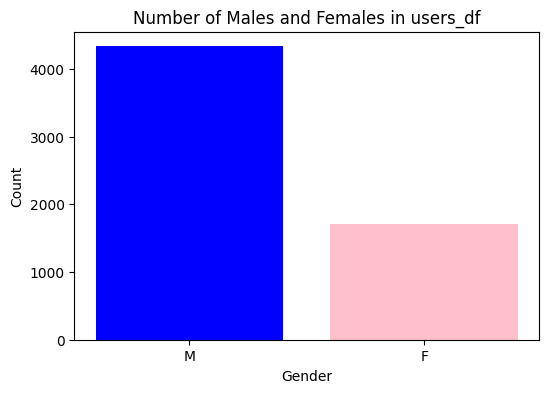

In [21]:
gender_counts = users_df["Gender"].value_counts()

plt.figure(figsize=(6,4))
plt.bar(gender_counts.index, gender_counts.values, color=["blue", "pink"])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Number of Males and Females in users_df')
plt.show()

In [2]:
# Create a histogram to visualize the distribution of ages
plt.figure(figsize=(8, 6))
plt.hist(users_df["Age"], bins=10, color='green', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution in users_df')
plt.show()

NameError: name 'plt' is not defined

In [1]:
# Create a histogram to visualize the distribution of ratings
plt.figure(figsize=(8, 6))
plt.hist(ratings_df["Rating"], bins=10, color='yellow', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating Distribution in ratings_df')
plt.show()

NameError: name 'plt' is not defined

In [26]:
# Define a function to categorize ages with custom labels
def categorize_age_with_labels(age):
    if age < 18:
        return 'teenager'
    elif 18 <= age <= 24:
        return 'teenager'
    elif 25 <= age <= 34:
        return 'earlyadult'
    elif 35 <= age <= 44:
        return 'midadult'
    elif 45 <= age <= 49:
        return 'lateadult'
    elif 50 <= age <= 55:
        return 'lateadult'
    else:
        return 'senior'

# Apply the function to the 'Age' column to categorize ages with custom labels
users_df['Age_Category'] = users_df['Age'].apply(categorize_age_with_labels)
users_df

,UserID,Gender,Age,Occupation,Zip-code,Age_Category
0,1,F,1,10,48067,teenager
1,2,M,56,16,70072,senior
2,3,M,25,15,55117,earlyadult
3,4,M,45,7,02460,lateadult
4,5,M,25,20,55455,earlyadult
...,...,...,...,...,...,...
6035,6036,F,25,15,32603,earlyadult
6036,6037,F,45,1,76006,lateadult
6037,6038,F,56,1,14706,senior
6038,6039,F,45,0,01060,lateadult


Data preprocessing

In [29]:
# Set age to 0 for all users whose age is less than 18
users_df.loc[users_df["Age"] < 18, "Age"] = 0
users_df.loc[users_df["Age"] < 18, "Age_Category"] = None
print(users_df.head())

   UserID Gender  Age  Occupation Zip-code Age_Category
0       1      F    0          10    48067         None
1       2      M   56          16    70072       senior
2       3      M   25          15    55117   earlyadult
3       4      M   45           7    02460    lateadult
4       5      M   25          20    55455   earlyadult
